## Books 기본 EDA
1. 데이터 로드 및 기본 정보 - 데이터 크기, 컬럼, 샘플 확인
1. 데이터 타입 및 Info - 데이터 타입과 메모리 사용량
1. 결측치 분석 - 컬럼별 결측치 비율 및 히트맵 시각화
1. ISBN 분석 - 고유값, 중복 확인
1. Year of Publication 분석 - 통계, 이상치, 분포 시각화
1. Year 시각화 - 히스토그램, 최근 30년 추이, Top 20 연도, 박스플롯
1. Publisher 분석 - Top 20 출판사 통계 및 시각화
1. Author 분석 - Top 20 작가, 작가당 책 수 분포
1. Language 분석 - 언어별 분포 (바차트, 파이차트)
1. Category 분석 - Top 30 카테고리 추출 및 시각화
1. Summary 분석 - 요약문 길이, 단어 수 통계 및 분포
1. Image 분석 - 이미지 URL 도메인 분석
1. 종합 요약 통계 - 주요 지표 종합
1. 데이터 품질 종합 시각화 - 완성도, 출판 추이, 출판사별 트렌드, 카테고리별 평균 연도

### 데이터 로드 및 기본 정보 - 데이터 크기, 컬럼, 샘플 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 스타일 설정
plt.style.use('default')
sns.set_palette("husl")

# 데이터 로드
data_path = Path('../../data/books.csv')
books = pd.read_csv(data_path)

print("=" * 80)
print("BOOKS DATASET - BASIC EDA")
print("=" * 80)
print(f"\nTotal number of books: {len(books):,}")
print(f"Number of columns: {len(books.columns)}")
print(f"Columns: {list(books.columns)}")

# 첫 몇 행 확인
books.head(10)

BOOKS DATASET - BASIC EDA

Total number of books: 149,570
Number of columns: 10
Columns: ['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher', 'img_url', 'language', 'category', 'summary', 'img_path']


,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg
5,0671870432,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...,NaN,NaN,NaN,images/0671870432.01.THUMBZZZ.jpg
6,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg
7,0771074670,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,en,['Fiction'],Another story based in the fictional rural tow...,images/0771074670.01.THUMBZZZ.jpg
8,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg
9,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg


### 데이터 타입 및 Info - 데이터 타입과 메모리 사용량

In [2]:
# 데이터 타입 및 기본 정보
print("Data types:")
print(books.dtypes)
print("\n" + "=" * 80)

books.info()

Data types:
isbn                    object
book_title              object
book_author             object
year_of_publication    float64
publisher               object
img_url                 object
language                object
category                object
summary                 object
img_path                object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149569 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null  

### 결측치 분석 - 컬럼별 결측치 비율 및 히트맵 시각화

MISSING VALUES ANALYSIS
                     Missing Count  Percentage
category                     68851   46.032627
language                     67227   44.946848
summary                      67227   44.946848
book_author                      1    0.000669
book_title                       0    0.000000
isbn                             0    0.000000
img_url                          0    0.000000
publisher                        0    0.000000
year_of_publication              0    0.000000
img_path                         0    0.000000


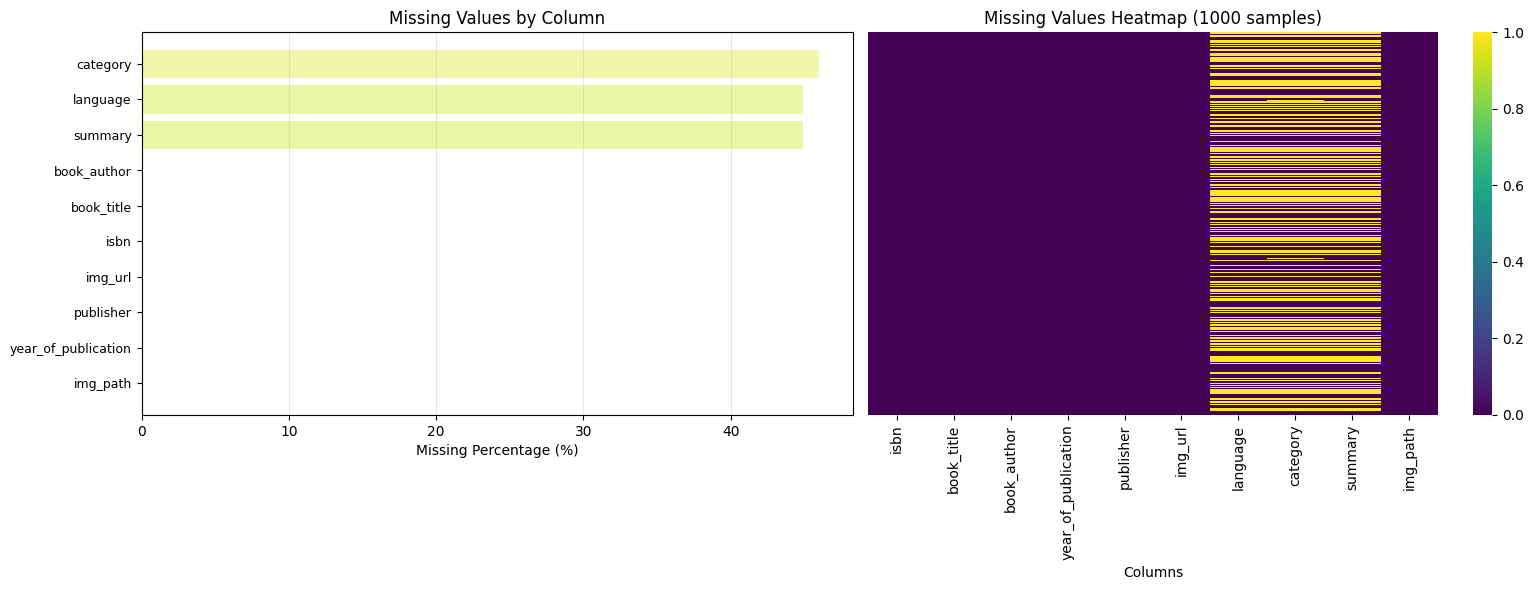

In [3]:
# 결측치 분석
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = books.isnull().sum()
missing_pct = (books.isnull().sum() / len(books)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

print(missing_df)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 결측치 비율 바차트
colors = plt.cm.RdYlGn_r(missing_df['Percentage'] / 100)
ax[0].barh(range(len(missing_df)), missing_df['Percentage'], color=colors)
ax[0].set_yticks(range(len(missing_df)))
ax[0].set_yticklabels(missing_df.index, fontsize=9)
ax[0].set_xlabel('Missing Percentage (%)')
ax[0].set_title('Missing Values by Column')
ax[0].grid(axis='x', alpha=0.3)
ax[0].invert_yaxis()

# 결측치 히트맵 (샘플링)
sample_books = books.sample(min(1000, len(books)), random_state=42)
sns.heatmap(sample_books.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=ax[1])
ax[1].set_title('Missing Values Heatmap (1000 samples)')
ax[1].set_xlabel('Columns')

plt.tight_layout()
plt.show()

### ISBN 분석 - 고유값, 중복 확인

In [4]:
# ISBN 분석
print("=" * 80)
print("ISBN ANALYSIS")
print("=" * 80)

print(f"Total ISBNs: {len(books):,}")
print(f"Unique ISBNs: {books['isbn'].nunique():,}")
print(f"Duplicate ISBNs: {len(books) - books['isbn'].nunique():,}")

if books['isbn'].duplicated().any():
    print(f"\nTop 10 duplicate ISBNs:")
    print(books['isbn'].value_counts().head(10))

ISBN ANALYSIS
Total ISBNs: 149,570
Unique ISBNs: 149,570
Duplicate ISBNs: 0


### Year of Publication 분석 - 통계, 이상치, 분포 시각화

In [5]:
# Year of Publication 분석
print("=" * 80)
print("YEAR OF PUBLICATION ANALYSIS")
print("=" * 80)

print(f"Books with year info: {books['year_of_publication'].notna().sum():,} ({books['year_of_publication'].notna().sum()/len(books)*100:.2f}%)")
print(f"Books without year info: {books['year_of_publication'].isna().sum():,} ({books['year_of_publication'].isna().sum()/len(books)*100:.2f}%)")

print(f"\nYear statistics (non-null):")
print(books['year_of_publication'].describe())

# 이상치 확인
year_data = books['year_of_publication'].dropna()
print(f"\nYear range: {year_data.min():.0f} - {year_data.max():.0f}")

# 비정상적인 연도 확인
unusual_years = books[(books['year_of_publication'] < 1000) | (books['year_of_publication'] > 2025)]
print(f"Unusual years (< 1000 or > 2025): {len(unusual_years):,}")
if len(unusual_years) > 0:
    print(f"Sample unusual years: {sorted(unusual_years['year_of_publication'].unique())[:20]}")

YEAR OF PUBLICATION ANALYSIS
Books with year info: 149,570 (100.00%)
Books without year info: 0 (0.00%)

Year statistics (non-null):
count    149570.000000
mean       1994.590606
std           8.179733
min        1376.000000
25%        1991.000000
50%        1996.000000
75%        2000.000000
max        2006.000000
Name: year_of_publication, dtype: float64

Year range: 1376 - 2006
Unusual years (< 1000 or > 2025): 0


### Year 시각화 - 히스토그램, 최근 30년 추이, Top 20 연도, 박스플롯

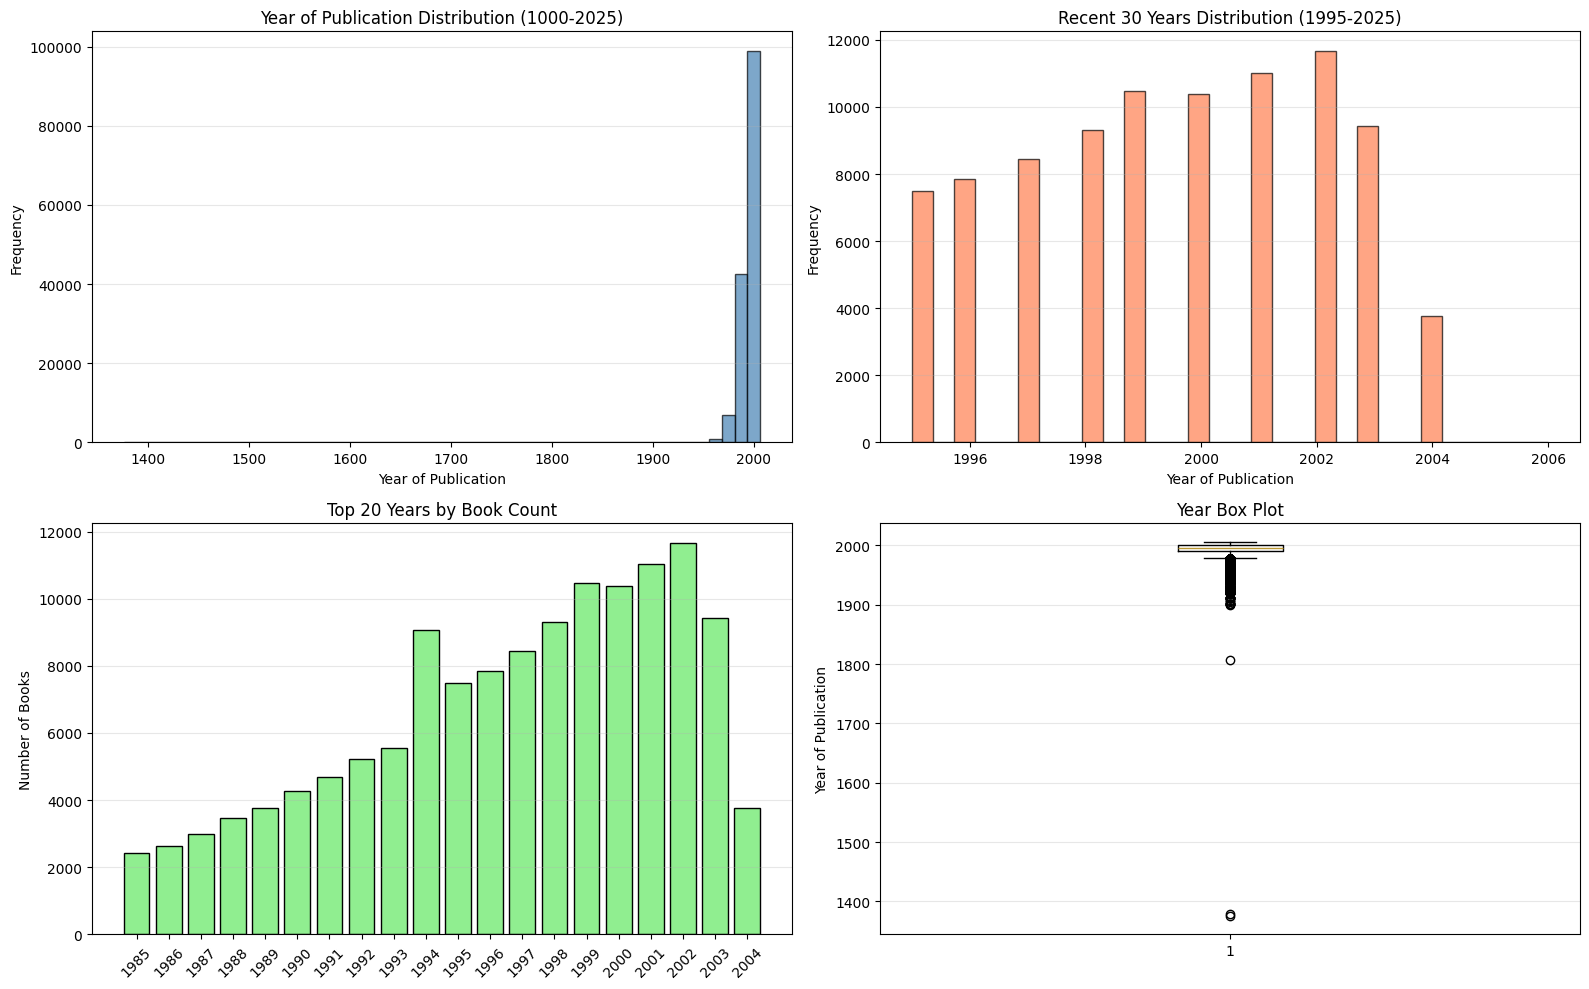

In [6]:
# Year 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 연도 분포 (히스토그램)
valid_years = books[(books['year_of_publication'] >= 1000) & (books['year_of_publication'] <= 2025)]
axes[0, 0].hist(valid_years['year_of_publication'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Year of Publication')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Year of Publication Distribution (1000-2025)')
axes[0, 0].grid(axis='y', alpha=0.3)

# 최근 30년 분포
recent_years = books[books['year_of_publication'] >= 1995]
axes[0, 1].hist(recent_years['year_of_publication'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Year of Publication')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Recent 30 Years Distribution (1995-2025)')
axes[0, 1].grid(axis='y', alpha=0.3)

# 연도별 책 수 (Top 20 years)
top_years = books['year_of_publication'].value_counts().head(20).sort_index()
axes[1, 0].bar(range(len(top_years)), top_years.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_xticks(range(len(top_years)))
axes[1, 0].set_xticklabels([f"{int(y)}" for y in top_years.index], rotation=45)
axes[1, 0].set_ylabel('Number of Books')
axes[1, 0].set_title('Top 20 Years by Book Count')
axes[1, 0].grid(axis='y', alpha=0.3)

# 연도 박스플롯
axes[1, 1].boxplot(valid_years['year_of_publication'].dropna(), vert=True)
axes[1, 1].set_ylabel('Year of Publication')
axes[1, 1].set_title('Year Box Plot')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Publisher 분석 - Top 20 출판사 통계 및 시각화

PUBLISHER ANALYSIS
Books with publisher info: 149,570 (100.00%)
Unique publishers: 11,571

Top 20 publishers:
publisher
Harlequin                   3005
Ballantine Books            2322
Pocket                      2274
Penguin Books               1943
Bantam Books                1938
Berkley Publishing Group    1754
Silhouette                  1684
Warner Books                1667
Scholastic                  1586
Simon & Schuster            1578
Signet Book                 1332
Penguin USA                 1315
Harpercollins               1303
Bantam                      1217
Avon                        1185
Fawcett Books               1146
Random House Inc            1098
Vintage Books USA           1095
Tor Books                   1092
St. Martin's Press          1065
Name: count, dtype: int64


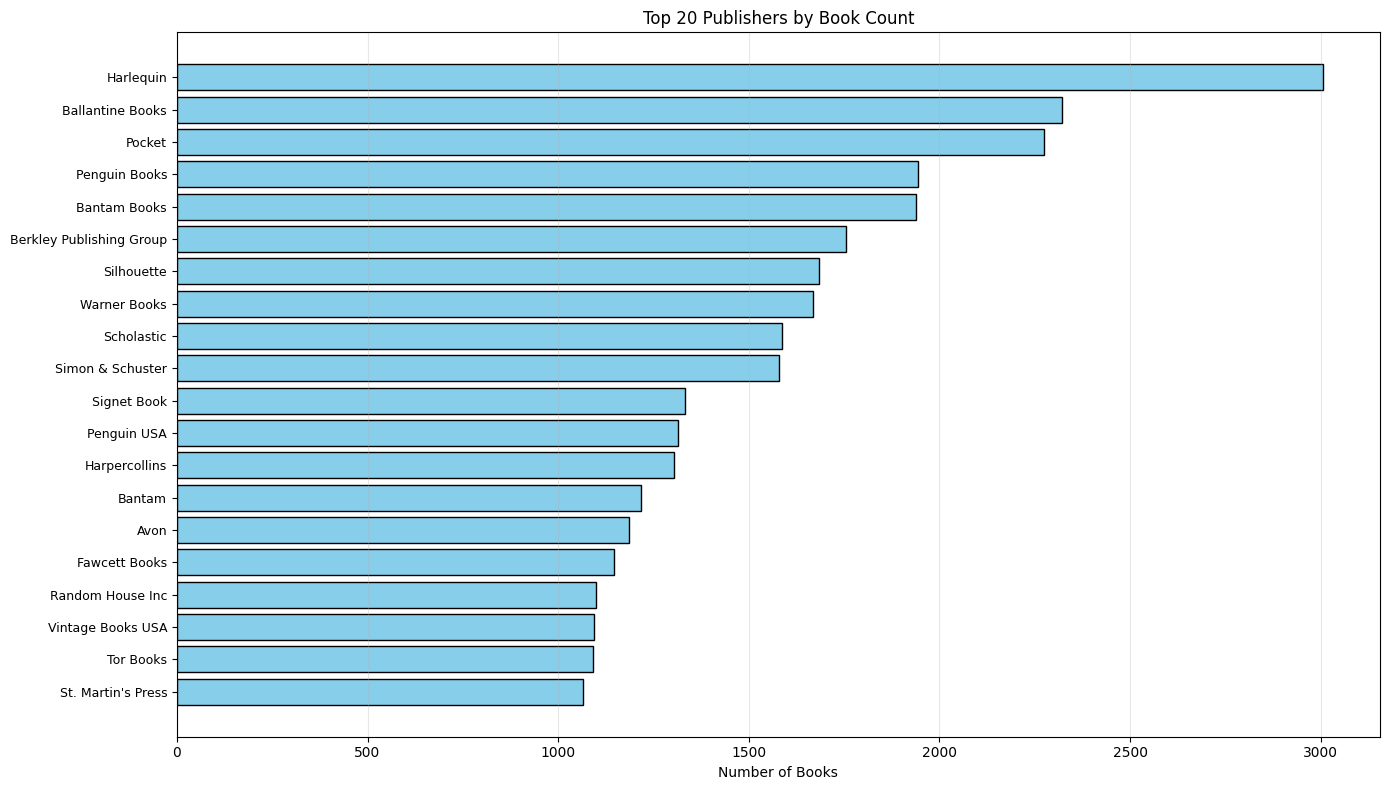

In [7]:
# Publisher 분석
print("=" * 80)
print("PUBLISHER ANALYSIS")
print("=" * 80)

print(f"Books with publisher info: {books['publisher'].notna().sum():,} ({books['publisher'].notna().sum()/len(books)*100:.2f}%)")
print(f"Unique publishers: {books['publisher'].nunique():,}")

print(f"\nTop 20 publishers:")
print(books['publisher'].value_counts().head(20))

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

top_publishers = books['publisher'].value_counts().head(20)
ax.barh(range(len(top_publishers)), top_publishers.values, color='skyblue', edgecolor='black')
ax.set_yticks(range(len(top_publishers)))
ax.set_yticklabels(top_publishers.index, fontsize=9)
ax.set_xlabel('Number of Books')
ax.set_title('Top 20 Publishers by Book Count')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

### Author 분석 - Top 20 작가, 작가당 책 수 분포

AUTHOR ANALYSIS
Books with author info: 149,569 (100.00%)
Unique authors: 62,058

Top 20 authors by book count:
book_author
Stephen King             446
Agatha Christie          404
William Shakespeare      381
Barbara Cartland         283
Nora Roberts             241
Terry Pratchett          198
Isaac Asimov             195
Charles Dickens          187
Carolyn Keene            185
Ann M. Martin            183
Piers Anthony            166
Not Applicable (Na )     163
Marion Zimmer Bradley    163
R. L. Stine              162
Jane Austen              161
Mary Higgins Clark       156
Mark Twain               153
Francine Pascal          152
J. R. R. Tolkien         151
Roald Dahl               150
Name: count, dtype: int64

Books per author statistics:
  Mean: 2.41
  Median: 1.00
  Max: 446


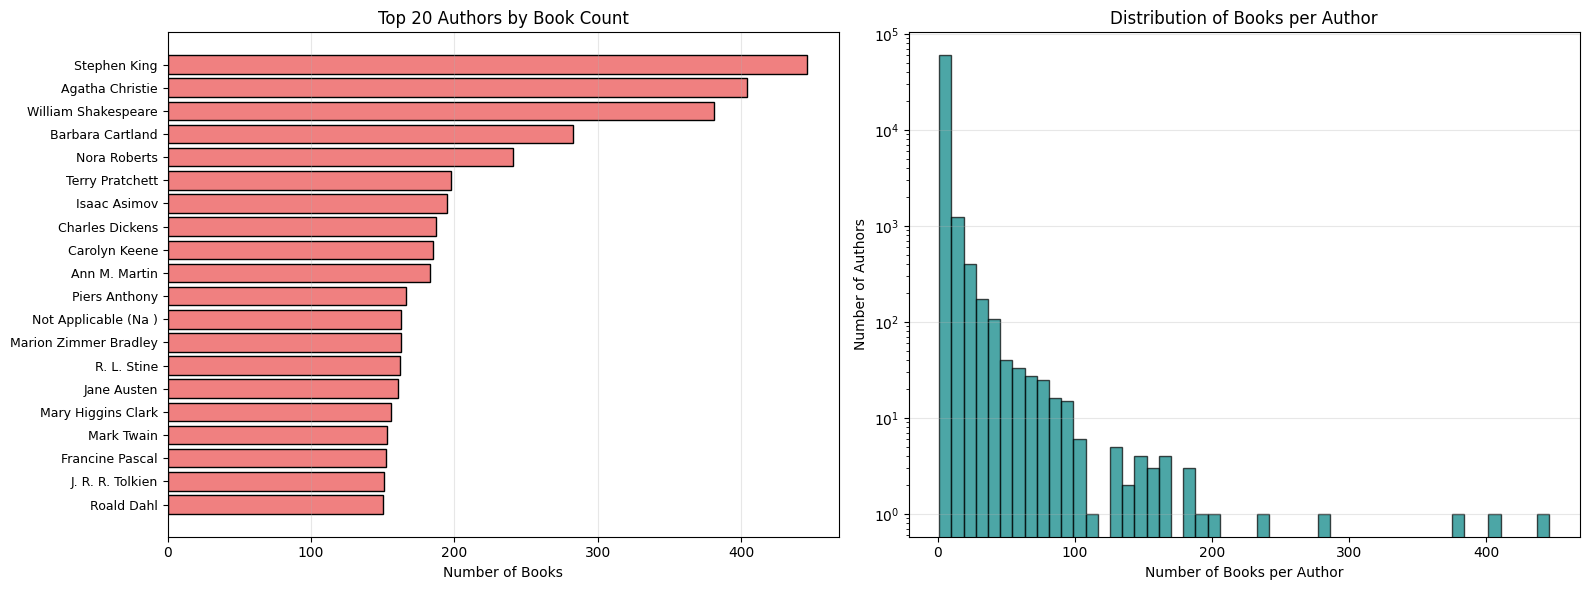

In [8]:
# Author 분석
print("=" * 80)
print("AUTHOR ANALYSIS")
print("=" * 80)

print(f"Books with author info: {books['book_author'].notna().sum():,} ({books['book_author'].notna().sum()/len(books)*100:.2f}%)")
print(f"Unique authors: {books['book_author'].nunique():,}")

print(f"\nTop 20 authors by book count:")
print(books['book_author'].value_counts().head(20))

# 작가당 평균 책 수
books_per_author = books['book_author'].value_counts()
print(f"\nBooks per author statistics:")
print(f"  Mean: {books_per_author.mean():.2f}")
print(f"  Median: {books_per_author.median():.2f}")
print(f"  Max: {books_per_author.max()}")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 작가
top_authors = books['book_author'].value_counts().head(20)
axes[0].barh(range(len(top_authors)), top_authors.values, color='lightcoral', edgecolor='black')
axes[0].set_yticks(range(len(top_authors)))
axes[0].set_yticklabels(top_authors.index, fontsize=9)
axes[0].set_xlabel('Number of Books')
axes[0].set_title('Top 20 Authors by Book Count')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# 작가당 책 수 분포
axes[1].hist(books_per_author.values, bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[1].set_xlabel('Number of Books per Author')
axes[1].set_ylabel('Number of Authors')
axes[1].set_title('Distribution of Books per Author')
axes[1].set_yscale('log')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Language 분석 - 언어별 분포 (바차트, 파이차트)

LANGUAGE ANALYSIS
Books with language info: 82,343 (55.05%)
Unique languages: 26

Language distribution:
language
en       78823
de        1282
es        1017
fr         883
it         123
nl          67
pt          47
da          37
ca          23
ms          10
no           6
zh-CN        3
la           3
ru           3
ja           3
gl           3
ro           1
el           1
th           1
fa           1
eo           1
gd           1
ga           1
vi           1
zh-TW        1
ko           1
Name: count, dtype: int64


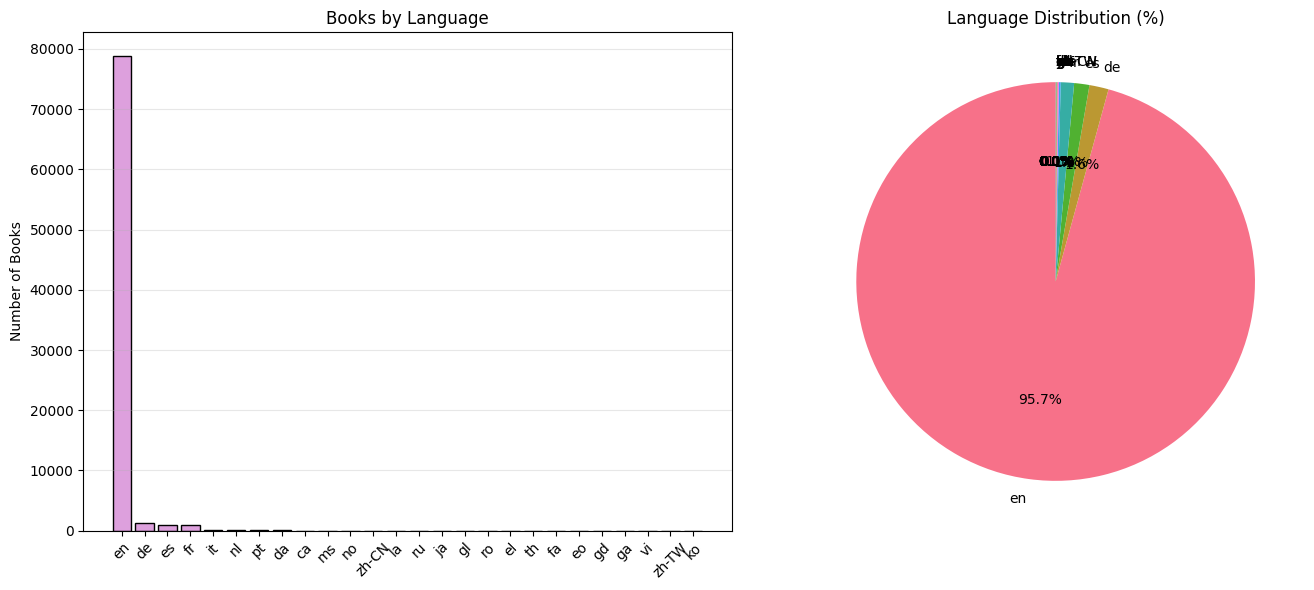

In [9]:
# Language 분석
print("=" * 80)
print("LANGUAGE ANALYSIS")
print("=" * 80)

print(f"Books with language info: {books['language'].notna().sum():,} ({books['language'].notna().sum()/len(books)*100:.2f}%)")
print(f"Unique languages: {books['language'].nunique():,}")

print(f"\nLanguage distribution:")
print(books['language'].value_counts())

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 언어별 분포 (바차트)
lang_counts = books['language'].value_counts()
axes[0].bar(range(len(lang_counts)), lang_counts.values, color='plum', edgecolor='black')
axes[0].set_xticks(range(len(lang_counts)))
axes[0].set_xticklabels(lang_counts.index, rotation=45)
axes[0].set_ylabel('Number of Books')
axes[0].set_title('Books by Language')
axes[0].grid(axis='y', alpha=0.3)

# 언어별 비율 (파이차트)
axes[1].pie(lang_counts.values, labels=lang_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Language Distribution (%)')

plt.tight_layout()
plt.show()

### Category 분석 - Top 30 카테고리 추출 및 시각화

CATEGORY ANALYSIS
Books with category info: 80,719 (53.97%)
Total category entries: 80,719
Unique categories: 4,292

Top 30 categories:
  Fiction: 32,956
  Juvenile Fiction: 5,804
  Biography & Autobiography: 3,320
  History: 1,925
  Religion: 1,818
  Juvenile Nonfiction: 1,417
  Social Science: 1,231
  Humor: 1,161
  Body, Mind & Spirit: 1,109
  Business & Economics: 1,070
  Cooking: 1,025
  Health & Fitness: 968
  Family & Relationships: 959
  Computers: 730
  Travel: 651
  Self-Help: 640
  Psychology: 635
  Poetry: 626
  Science: 624
  Art: 562
  Literary Criticism: 560
  Nature: 490
  Philosophy: 481
  Reference: 471
  Drama: 459
  Performing Arts: 457
  Sports & Recreation: 446
  Political Science: 430
  Comics & Graphic Novels: 418
  Crafts & Hobbies: 411


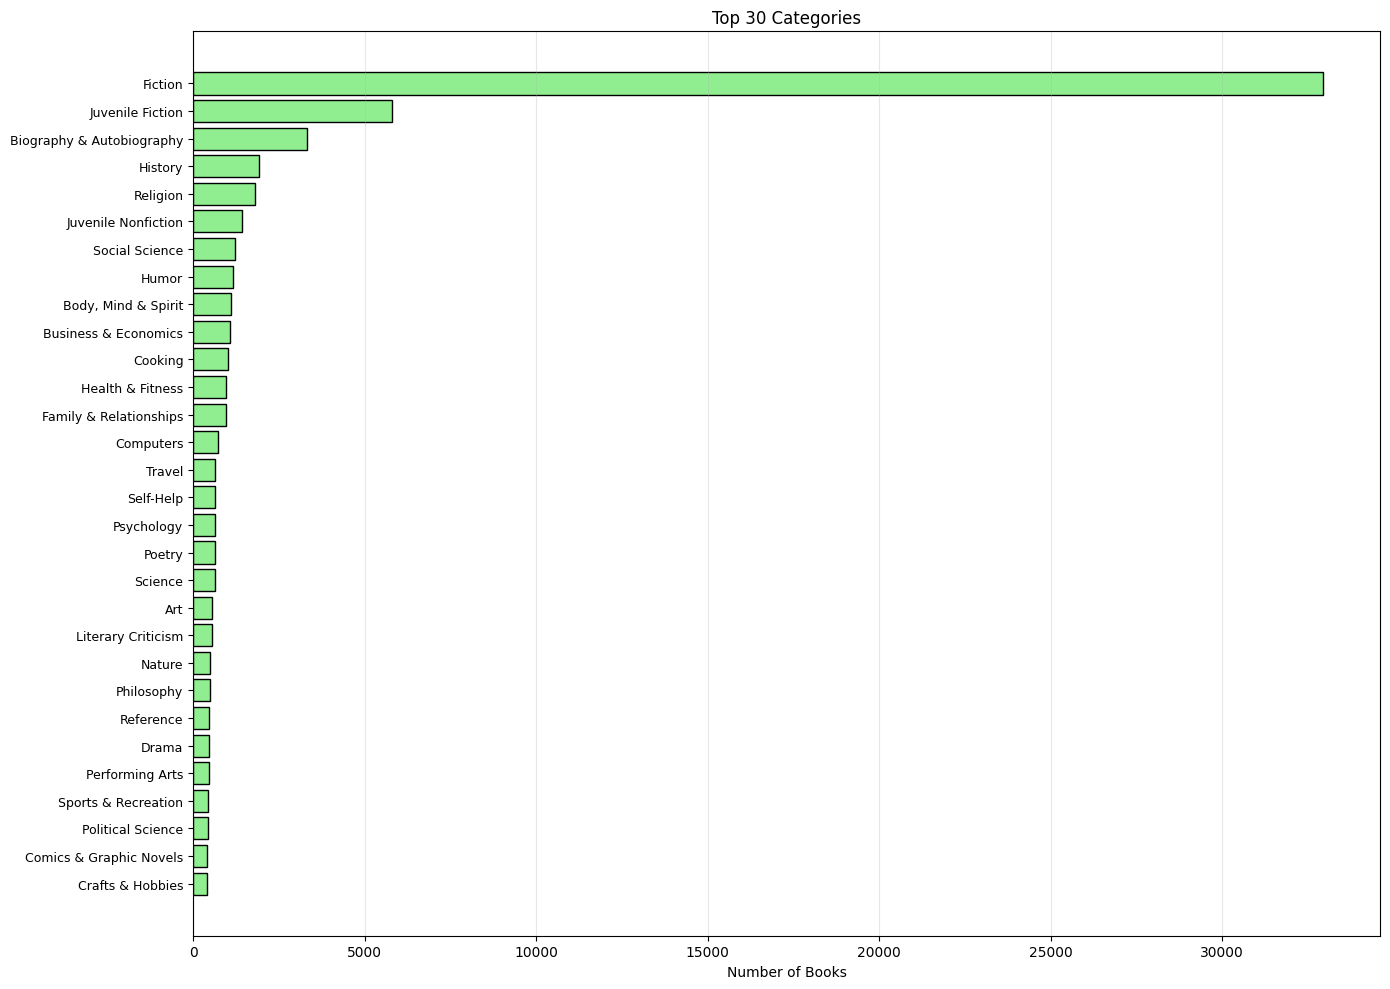

In [10]:
# Category 분석
print("=" * 80)
print("CATEGORY ANALYSIS")
print("=" * 80)

print(f"Books with category info: {books['category'].notna().sum():,} ({books['category'].notna().sum()/len(books)*100:.2f}%)")

# category는 리스트 형태로 저장되어 있을 수 있으므로 파싱 필요
import ast

def parse_category(cat):
    if pd.isna(cat):
        return []
    try:
        return ast.literal_eval(cat) if isinstance(cat, str) else []
    except:
        return []

books['category_list'] = books['category'].apply(parse_category)

# 모든 카테고리 추출
all_categories = []
for cat_list in books['category_list']:
    all_categories.extend(cat_list)

print(f"Total category entries: {len(all_categories):,}")
print(f"Unique categories: {len(set(all_categories)):,}")

# 카테고리별 빈도
from collections import Counter
category_counts = Counter(all_categories)

print(f"\nTop 30 categories:")
for cat, count in category_counts.most_common(30):
    print(f"  {cat}: {count:,}")

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

top_categories = dict(category_counts.most_common(30))
ax.barh(range(len(top_categories)), list(top_categories.values()), color='lightgreen', edgecolor='black')
ax.set_yticks(range(len(top_categories)))
ax.set_yticklabels(list(top_categories.keys()), fontsize=9)
ax.set_xlabel('Number of Books')
ax.set_title('Top 30 Categories')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

### Summary 분석 - 요약문 길이, 단어 수 통계 및 분포

SUMMARY TEXT ANALYSIS
Books with summary: 82,343 (55.05%)
Books without summary: 67,227 (44.95%)

Summary length statistics (characters):
count    82343.000000
mean       172.169013
std         59.660750
min          1.000000
25%        126.000000
50%        181.000000
75%        227.000000
max        374.000000
Name: summary_length, dtype: float64

Summary word count statistics:
count    82343.000000
mean        27.553708
std          9.821899
min          1.000000
25%         20.000000
50%         29.000000
75%         36.000000
max         55.000000
Name: summary_word_count, dtype: float64


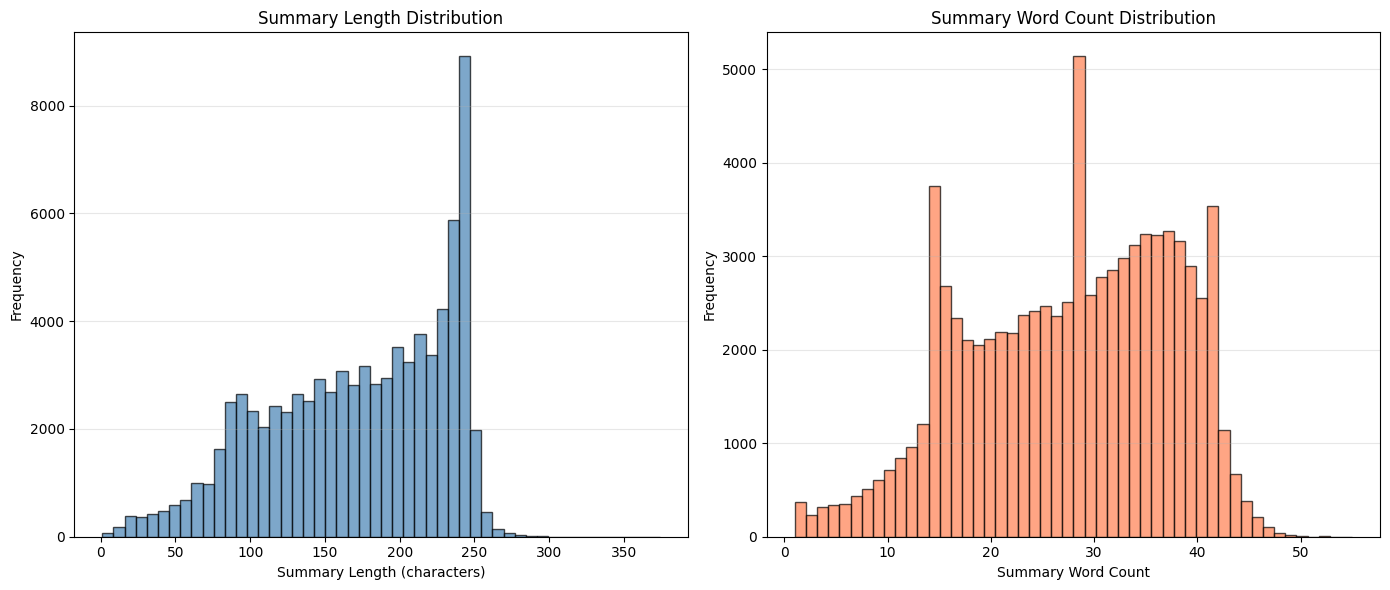

In [11]:
# Summary 분석
print("=" * 80)
print("SUMMARY TEXT ANALYSIS")
print("=" * 80)

print(f"Books with summary: {books['summary'].notna().sum():,} ({books['summary'].notna().sum()/len(books)*100:.2f}%)")
print(f"Books without summary: {books['summary'].isna().sum():,} ({books['summary'].isna().sum()/len(books)*100:.2f}%)")

# Summary 길이 분석
books['summary_length'] = books['summary'].fillna('').apply(len)
books['summary_word_count'] = books['summary'].fillna('').apply(lambda x: len(x.split()))

print(f"\nSummary length statistics (characters):")
print(books[books['summary'].notna()]['summary_length'].describe())

print(f"\nSummary word count statistics:")
print(books[books['summary'].notna()]['summary_word_count'].describe())

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Summary 길이 분포
summary_with_text = books[books['summary_length'] > 0]
axes[0].hist(summary_with_text['summary_length'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Summary Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Summary Length Distribution')
axes[0].grid(axis='y', alpha=0.3)

# Summary 단어 수 분포
axes[1].hist(summary_with_text['summary_word_count'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Summary Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Summary Word Count Distribution')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Image 분석 - 이미지 URL 도메인 분석

IMAGE ANALYSIS
Books with img_url: 149,570 (100.00%)
Books with img_path: 149,570 (100.00%)

Image URL domains:
img_domain
images.amazon.com    149570
Name: count, dtype: int64


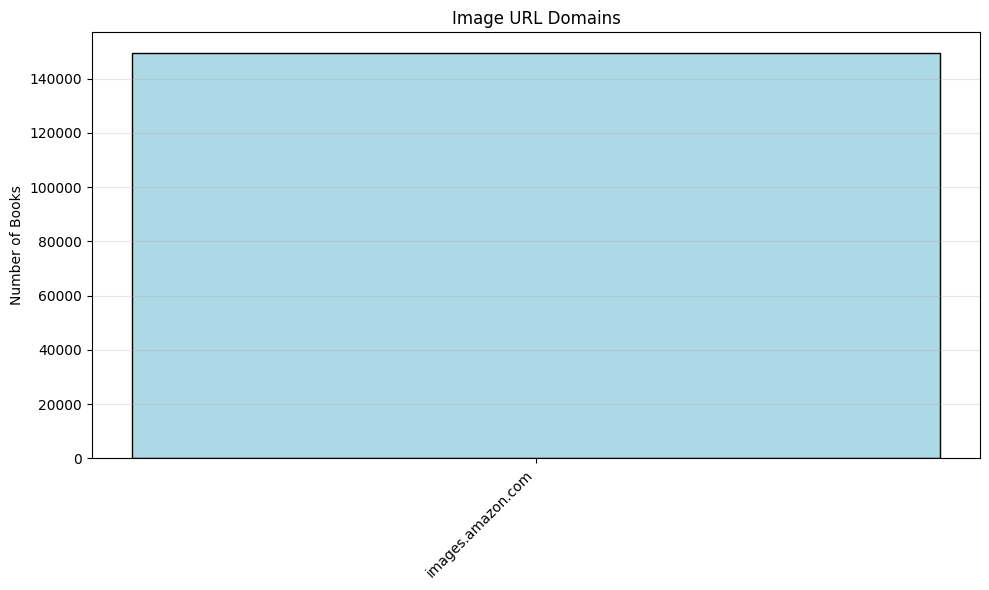

In [12]:
# 이미지 URL 및 경로 분석
print("=" * 80)
print("IMAGE ANALYSIS")
print("=" * 80)

print(f"Books with img_url: {books['img_url'].notna().sum():,} ({books['img_url'].notna().sum()/len(books)*100:.2f}%)")
print(f"Books with img_path: {books['img_path'].notna().sum():,} ({books['img_path'].notna().sum()/len(books)*100:.2f}%)")

# 이미지 URL 도메인 분석
books['img_domain'] = books['img_url'].fillna('').apply(lambda x: x.split('/')[2] if '://' in x and len(x.split('/')) > 2 else 'N/A')
print(f"\nImage URL domains:")
print(books['img_domain'].value_counts())

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

domain_counts = books['img_domain'].value_counts()
ax.bar(range(len(domain_counts)), domain_counts.values, color='lightblue', edgecolor='black')
ax.set_xticks(range(len(domain_counts)))
ax.set_xticklabels(domain_counts.index, rotation=45, ha='right')
ax.set_ylabel('Number of Books')
ax.set_title('Image URL Domains')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 종합 요약 통계 - 주요 지표 종합

In [13]:
# 종합 요약 통계
print("=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)

summary_stats = {
    'Total Books': len(books),
    'Unique ISBNs': books['isbn'].nunique(),
    'Unique Authors': books['book_author'].nunique(),
    'Unique Publishers': books['publisher'].nunique(),
    'Unique Languages': books['language'].nunique(),
    'Unique Categories': len(set(all_categories)),
    'Books with Year': books['year_of_publication'].notna().sum(),
    'Year Coverage (%)': f"{books['year_of_publication'].notna().sum()/len(books)*100:.2f}%",
    'Most Common Year': books['year_of_publication'].mode()[0] if len(books['year_of_publication'].mode()) > 0 else 'N/A',
    'Most Prolific Author': books['book_author'].value_counts().index[0] if len(books) > 0 else 'N/A',
    'Most Common Publisher': books['publisher'].value_counts().index[0] if books['publisher'].notna().sum() > 0 else 'N/A',
    'Most Common Language': books['language'].value_counts().index[0] if books['language'].notna().sum() > 0 else 'N/A',
    'Books with Summary': books['summary'].notna().sum(),
    'Summary Coverage (%)': f"{books['summary'].notna().sum()/len(books)*100:.2f}%",
    'Books with Images': books['img_url'].notna().sum(),
    'Image Coverage (%)': f"{books['img_url'].notna().sum()/len(books)*100:.2f}%",
}

for key, value in summary_stats.items():
    print(f"{key:.<45} {value}")

print("=" * 80)

SUMMARY STATISTICS
Total Books.................................. 149570
Unique ISBNs................................. 149570
Unique Authors............................... 62058
Unique Publishers............................ 11571
Unique Languages............................. 26
Unique Categories............................ 4292
Books with Year.............................. 149570
Year Coverage (%)............................ 100.00%
Most Common Year............................. 2002.0
Most Prolific Author......................... Stephen King
Most Common Publisher........................ Harlequin
Most Common Language......................... en
Books with Summary........................... 82343
Summary Coverage (%)......................... 55.05%
Books with Images............................ 149570
Image Coverage (%)........................... 100.00%


### 데이터 품질 종합 시각화 - 완성도, 출판 추이, 출판사별 트렌드, 카테고리별 평균 연도

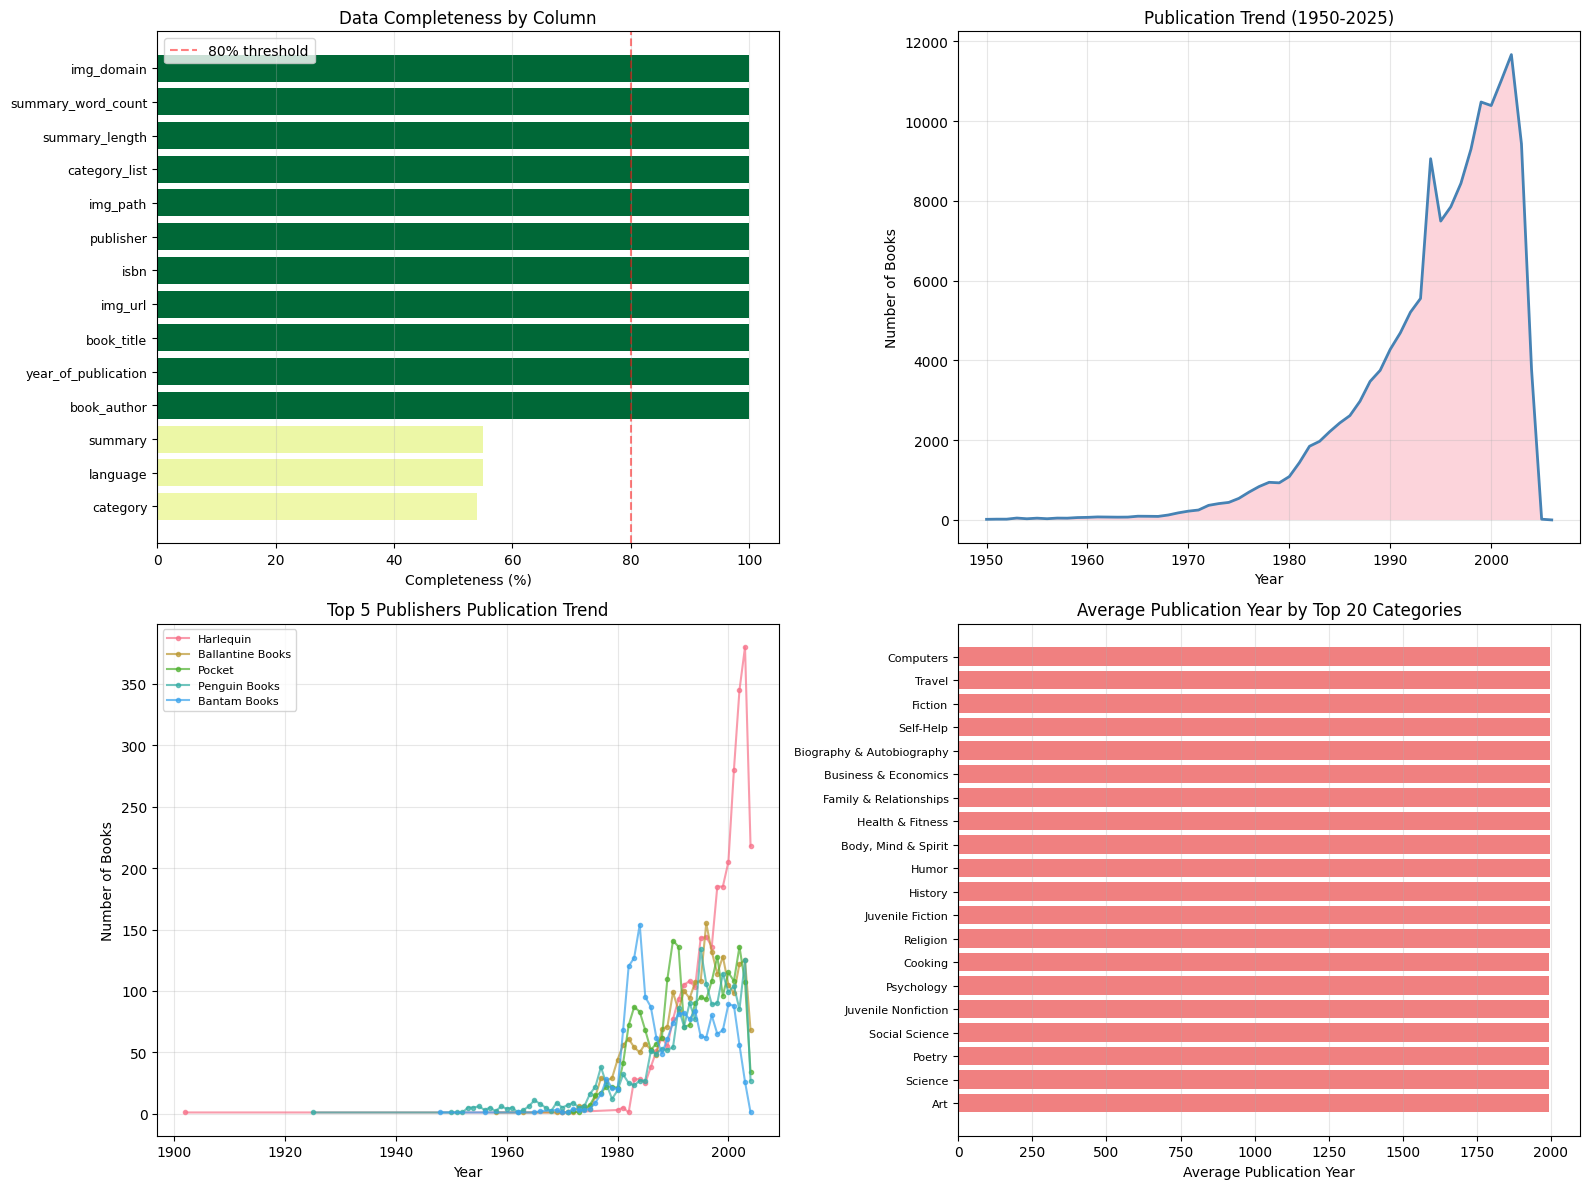


BOOKS EDA COMPLETE


In [14]:
# 데이터 품질 종합 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 컬럼별 데이터 완성도
completeness = {}
for col in books.columns:
    completeness[col] = (books[col].notna().sum() / len(books)) * 100

completeness_df = pd.DataFrame(list(completeness.items()), columns=['Column', 'Completeness'])
completeness_df = completeness_df.sort_values('Completeness', ascending=True)

colors = plt.cm.RdYlGn(completeness_df['Completeness'] / 100)
axes[0, 0].barh(range(len(completeness_df)), completeness_df['Completeness'], color=colors)
axes[0, 0].set_yticks(range(len(completeness_df)))
axes[0, 0].set_yticklabels(completeness_df['Column'], fontsize=9)
axes[0, 0].set_xlabel('Completeness (%)')
axes[0, 0].set_title('Data Completeness by Column')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].axvline(80, color='red', linestyle='--', alpha=0.5, label='80% threshold')
axes[0, 0].legend()

# 2. 연도별 책 출판 추이
year_trend = books[(books['year_of_publication'] >= 1950) & (books['year_of_publication'] <= 2025)]
year_counts = year_trend['year_of_publication'].value_counts().sort_index()
axes[0, 1].plot(year_counts.index, year_counts.values, linewidth=2, color='steelblue')
axes[0, 1].fill_between(year_counts.index, year_counts.values, alpha=0.3)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Books')
axes[0, 1].set_title('Publication Trend (1950-2025)')
axes[0, 1].grid(alpha=0.3)

# 3. Top 출판사의 연도별 출판량
top_5_publishers = books['publisher'].value_counts().head(5).index
for publisher in top_5_publishers:
    pub_books = books[books['publisher'] == publisher]
    pub_year_counts = pub_books['year_of_publication'].value_counts().sort_index()
    axes[1, 0].plot(pub_year_counts.index, pub_year_counts.values, label=publisher, marker='o', markersize=3, alpha=0.7)

axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Books')
axes[1, 0].set_title('Top 5 Publishers Publication Trend')
axes[1, 0].legend(fontsize=8, loc='upper left')
axes[1, 0].grid(alpha=0.3)

# 4. 카테고리별 평균 출판 연도
category_year_avg = {}
for cat, count in category_counts.most_common(20):
    cat_books = books[books['category_list'].apply(lambda x: cat in x)]
    avg_year = cat_books['year_of_publication'].mean()
    category_year_avg[cat] = avg_year

cat_year_df = pd.DataFrame(list(category_year_avg.items()), columns=['Category', 'Avg Year'])
cat_year_df = cat_year_df.sort_values('Avg Year')

axes[1, 1].barh(range(len(cat_year_df)), cat_year_df['Avg Year'], color='lightcoral')
axes[1, 1].set_yticks(range(len(cat_year_df)))
axes[1, 1].set_yticklabels(cat_year_df['Category'], fontsize=8)
axes[1, 1].set_xlabel('Average Publication Year')
axes[1, 1].set_title('Average Publication Year by Top 20 Categories')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("BOOKS EDA COMPLETE")
print("=" * 80)